In [189]:
print("Working with the hello world of the Classification datasets")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

Working with the hello world of the Classification datasets


In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
mnist = fetch_openml("mnist_784", as_frame=False)

In [ ]:
X,y =mnist.data, mnist.target

In [ ]:
mnist.DESCR

In [ ]:
mnist.target_names

In [ ]:
mnist.categories

In [ ]:
mnist.details

In [ ]:
mnist.feature_names

In [ ]:
print(X.shape)
y.shape

In [ ]:
def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")
plot_digit(X[0])
print(y[0])

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Tranining a Binary Classifier with sochastic Gradient Descent

In [ ]:
y_train_5 = (y_train == "5")
y_test_5 = (y_test == "5")
y_test_5

In [ ]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

In [ ]:
sgd_clf.predict([X_train[0]])

In [ ]:
y_train[0]

## Checking the performance using Cross-Validation

In [ ]:
scores = cross_val_score(sgd_clf, X_train, y_train_5, cv=5, scoring="accuracy", n_jobs=-1)
scores

## making a dummy variable that classifies every image as non 5

In [ ]:
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train,y_train_5)
print(any(dummy_clf.predict(X_train)))

In [ ]:
scores_dummy = cross_val_score(dummy_clf, X_train, y_train_5, cv=5, scoring="accuracy", n_jobs=-1)
scores_dummy

### Even with dummy variable we are getting over 90% accuracy. 

### So depending only on accuracy is not a good idea

## Building a Confusion Matrix 

In [30]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [31]:
y_train_predy

array([ True, False, False, ...,  True, False, False], shape=(60000,))

In [33]:
cm = confusion_matrix(y_train_5,y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

## Precision = TP/TP+FP

### A 100% percise algorithm is not good as it misses many positive instances 

### So it is balanced by Recall / True Positive Rate / Sensitivity

## Recall = TP/TP+FN

### Now lets compute some classifier metrics 

In [39]:
precision = precision_score(y_train_5, y_train_pred)
precision

0.8370879772350012

In [40]:
recall = recall_score(y_train_5, y_train_pred)
recall

0.6511713705958311

## F1 Score - Harmonic mean of precision and Recall 

### F1 = 2 x [precision x recall/precision + recall]

In [45]:
f1 = f1_score(y_train_5, y_train_pred)
f1

0.7325171197343847

### There is always a tradeoff between Percision and recall. both are inversely proportional and finding the right match between them is the key 

### This can me managed using Thresholds

### We cant directly set Threshold but we can get decision scores which helps us makes predictions

In [48]:
y_scores = sgd_clf.decision_function([X_train[0]])

array([2164.22030239])

In [52]:
threshold = 0
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([ True])

In [53]:
threshold = 3000
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([False])

### Increasing Threshold decreases recall

### To decide which Threshold to use we have different methods that we can use. 

### First use cross_val_predict to get decision scores 

In [115]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method="decision_function")
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447], shape=(60000,))

In [57]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

### thresholds = N
### precisions , recalls = N-1

## Percision Recall vs Threshold Curve 

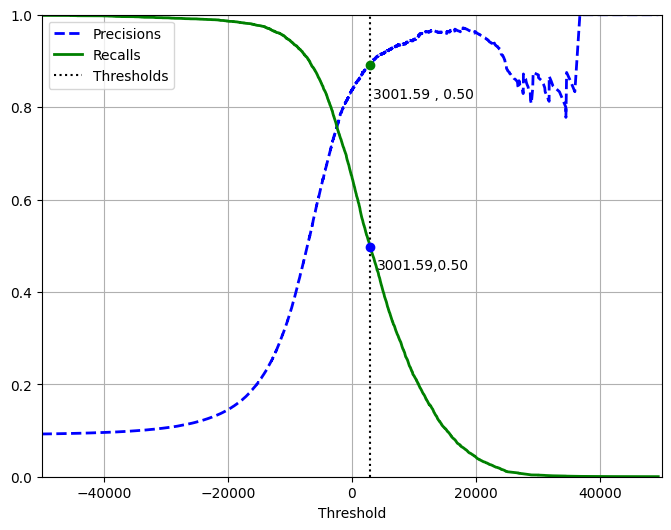

In [88]:
plt.figure(figsize=(8,6))
plt.plot(thresholds, precisions[:-1], "b--", label="Precisions", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recalls", linewidth=2)
plt.vlines(threshold,0.0,1.0, "k", "dotted", label="Thresholds")
plt.grid(True)
idx = (thresholds >= threshold).argmax()
plt.plot(thresholds[idx], recalls[idx], "bo")
plt.plot(thresholds[idx], precisions[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.xlabel("Threshold")
plt.text(4000,0.45,f"{float(thresholds[idx]):.2f},{float(recalls[idx]):.2f}",fontsize=10,color='black')
plt.text(3500,0.82,f"{float(thresholds[idx]):.2f} , {float(recalls[idx]):.2f}", fontsize=10, color='black')
plt.legend()


## Or we can plot Percision againt recall 

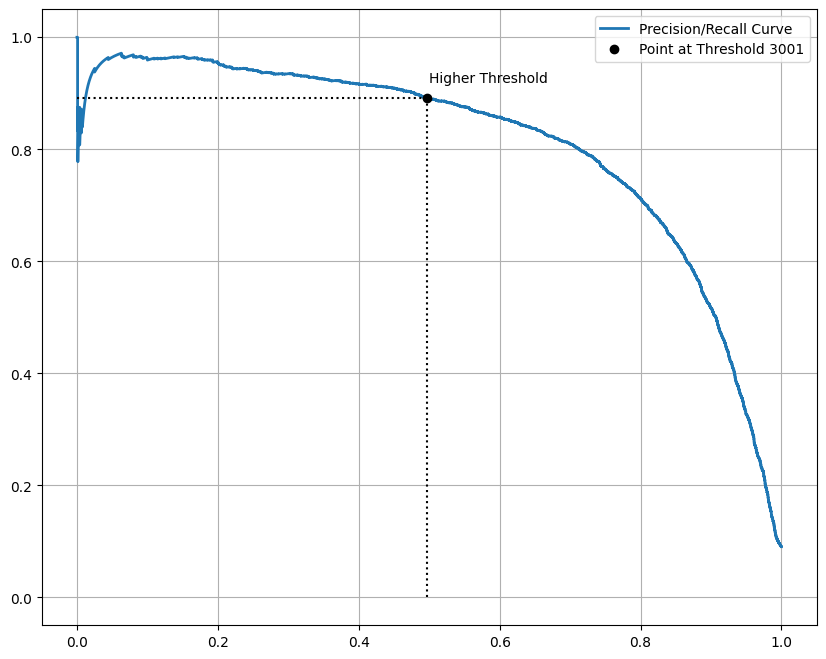

In [109]:
plt.figure(figsize=(10,8))
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall Curve")
plt.plot([recalls[idx],recalls[idx]] , [0. , precisions[idx]],"k:")
plt.plot([0.0, recalls[idx]] , [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]],[precisions[idx]],"ko",label="Point at Threshold 3001")
plt.text(0.5,0.92,"Higher Threshold", fontsize=10)
plt.grid()
plt.legend()
plt.show()

In [111]:
idx_for_90_precision = (precisions>=0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

np.float64(3370.0194991439557)

In [112]:
pred_y_train_90_precision = (y_scores>=threshold_for_90_precision)

In [113]:
precision_score(y_train_5,pred_y_train_90_precision)

0.9000345901072293

In [114]:
recall_score(y_train_5,pred_y_train_90_precision)

0.4799852425751706

## ROC Curve

### it's recall vs FPR

In [127]:
fpr, tpr, thresholds = roc_curve(y_train_5,y_scores)
thresholds

array([             inf,   49441.43765905,   36801.60697028, ...,
       -105763.22240074, -106527.45300471, -146348.56726174],
      shape=(3908,))

### Here Thresholds are organized in descending order 

In [128]:
idx_for_threshold_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90,fpr_90 = tpr[idx_for_threshold_90], fpr[idx_for_threshold_90]

In [130]:
print(tpr_90,fpr_90)

0.4799852425751706 0.005295076861063779


### if you know Threshold then to find TPR and FPR, use roc_curve

### ROC of a Random classifier is a straight line thorugh (0,0) and (1,1)
### This is called Chance or skill Line

### any classifier that performs better than random will have it's ROC curve above this line

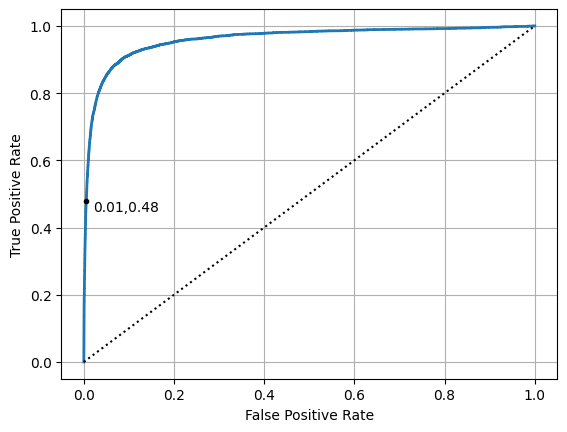

In [144]:
plt.plot(fpr, tpr, linewidth=2, label="ROC Curve")
plt.plot([0,1],[0,1],"k:", label="Random Classifier's ROC Curve")
plt.plot(fpr_90,tpr_90,"k.", label="Threshold for 90% Precision")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.text(0.020,0.45,f"{fpr_90:.2f},{tpr_90:.2f}")
plt.show()

## ROC AUC Score

### 1   ---> Perfect Classifier
### 0.5 ---> ROC of a Purely Random Classifier

In [147]:
roc_auc_score(y_train_5,y_scores)

np.float64(0.9604938554008616)

## Comparing SGD with Random Forest Classifier 

In [149]:
forest_clf = RandomForestClassifier(random_state=42)

In [154]:
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=3, method="predict_proba")

In [156]:
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

In [157]:
y_scores_forest = y_probas_forest[:,1]
precision_forest , recall_forest, thresholds_forest = precision_recall_curve(y_train_5,y_scores_forest)

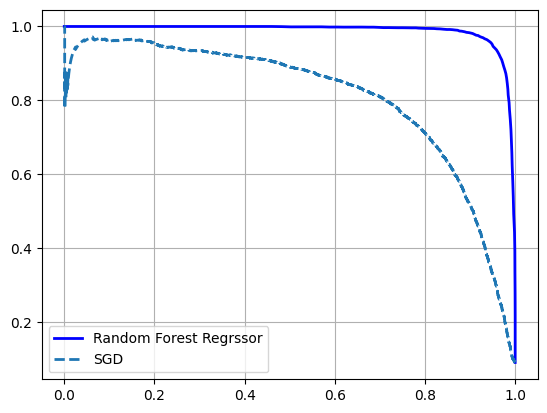

In [165]:
plt.plot(recall_forest , precision_forest, "b-", linewidth=2, label="Random Forest Regrssor")
plt.plot(recalls, precisions, '--', linewidth=2, label="SGD")
plt.grid()
plt.legend()

### More the curve to the top right corner, better the classifier model

In [167]:
y_train_pred_forest = y_probas_forest[:,1] >= 0.5
f1_score(y_train_5,y_train_pred_forest)

0.9274509803921569

In [169]:
roc_auc_score(y_train_5,y_scores_forest)

np.float64(0.9983436731328145)

In [171]:
precision_score(y_train_5,y_train_pred_forest)

0.9897468089558485

In [172]:
recall_score(y_train_5,y_train_pred_forest)

0.8725327430363402

## Multi Class Classification

### 2 types
### 1  --->  OVR / OVA
###          2  --->  OVO

### Using Support Vector Machine Classifiers[binary-classifier] on a multi class classification

In [174]:
svc_clf = SVC(random_state=42)
svc_clf.fit(X_train[:2000],y_train[:2000])

SVC(random_state=42)

In [176]:
svc_clf.predict([X_test[0]])

array(['7'], dtype=object)

In [177]:
y_test[0]

'7'

In [178]:
scores_some_digit = svc_clf.decision_function([X_test[0]])

In [179]:
scores_some_digit

array([[ 2.78394136, -0.28952983,  6.18491916,  7.23544003,  4.77771362,
         3.86237799,  0.70884902,  9.30920012,  1.75534038,  8.27108657]])

### Here the machine automatically uses OVO method. It chooses according to the available data IG

### Now lets implement OVA/OVR strategy 

In [183]:
ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000],y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [184]:
ovr_clf.predict([X_train[0]])

array(['5'], dtype='<U1')

In [185]:
y_train[0]

'5'

In [186]:
ovr_clf.estimators_

[SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42)]

## Error Analysis 

In [192]:
sgd_clf = SGDClassifier(random_state=42)
scaler = StandardScaler()
X_trained_scaler = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_trained_scaler, y_train, cv=3, scoring="accuracy",n_jobs=-1)

array([0.8983, 0.891 , 0.9018])

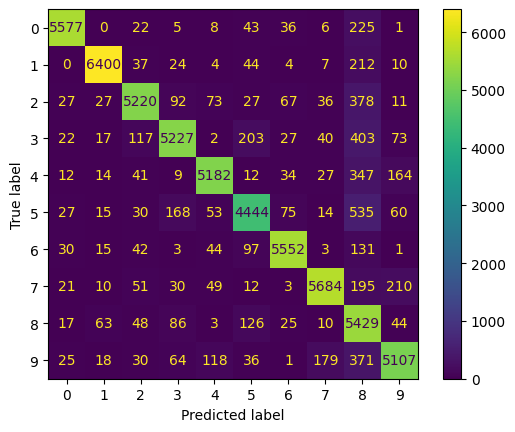

In [195]:
y_train_pred = cross_val_predict(sgd_clf, X_trained_scaler, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred)

### Normalized along rows

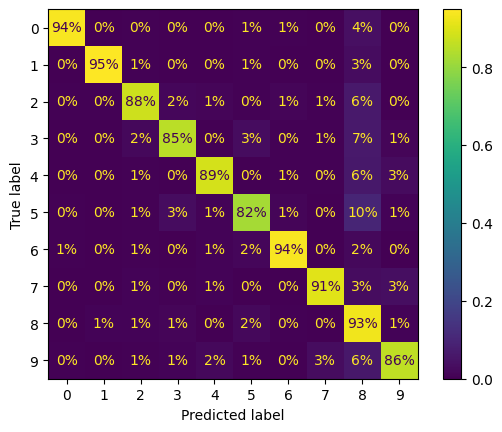

In [198]:
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,normalize='true', values_format = ".0%")

### Added weights 

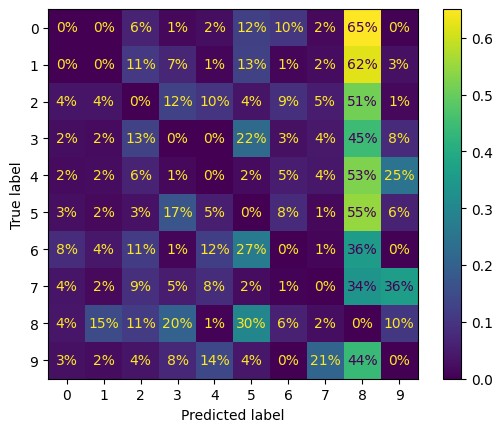

In [200]:
sample_weights = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,normalize='true', values_format = ".0%", sample_weight = sample_weights)

### Normalized along Columns

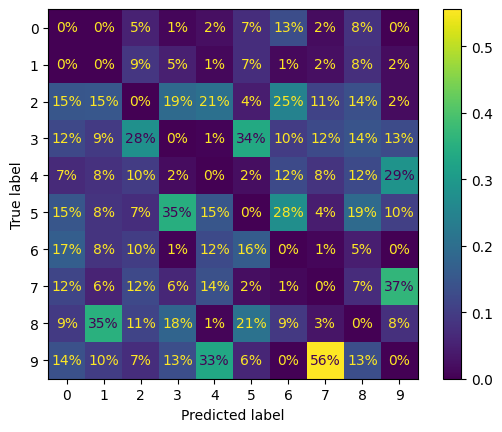

In [201]:
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,normalize='pred', values_format = ".0%", sample_weight = sample_weights)